In [40]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math


In [ ]:
def load_data(filename):
    data = np.loadtxt(filename, delimiter=',')
    X = data[:,:2]
    y = data[:,2]
    return X, y


In [26]:
def sigmoid(z):
 
    return 1/(1+np.exp(-z))

In [27]:
def map_feature(X1, X2):
    
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i + 1):
            out.append((X1**(i-j) * (X2**j)))
    return np.stack(out, axis=1)

In [28]:
def plot_data(X, y, pos_label="y=1", neg_label="y=0"):
    positive = y == 1
    negative = y == 0
    
    # Plot examples
    plt.plot(X[positive, 0], X[positive, 1], 'k+', label=pos_label)
    plt.plot(X[negative, 0], X[negative, 1], 'yo', label=neg_label)
    

In [29]:
def plot_decision_boundary(w, b, X, y):
     
    plot_data(X[:, 0:2], y)
    
    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)
        
        plt.plot(plot_x, plot_y, c="b")
        
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))

        # Evaluate z = theta*x over the grid
        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sig(np.dot(map_feature(u[i], v[j]), w) + b)
        
        # important to transpose z before calling contour       
        z = z.T
        
        # Plot z = 0.5
        plt.contour(u,v,z, levels = [0.5], colors="g")

        

In [30]:
# DataSet
X_train, y_train = load_data("ex2data2.txt")

In [31]:
#X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

#y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [32]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


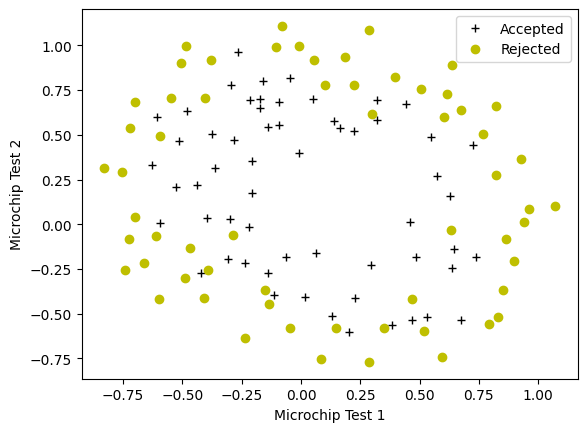

In [33]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# y-axis label
plt.ylabel('Microchip Test 2') 
# x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

In [34]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [43]:
def predict(X, w, b): 
    
    m, n = X.shape   
    p = np.zeros(m)
   
    for i in range(m):   
        z_wb = 0
        for j in range(n): 
            z_wb += X[i, j] * w[j]
        
        z_wb += b
        f_wb = 1 / (1 + np.exp(-z_wb))
        p[i] = 1 if f_wb >= 0.5 else 0
        
    
    return p

In [35]:
def compute_cost_reg(X, y, w, b, lambda_ = 1):
    m, n = X.shape
    
    cost = 0.
    for i in range(m):
        z_i = np.dot(X[i], w) + b                                      
        f_wb_i = sigmoid(z_i)                                          
        cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)      
             
    cost = cost/m                                                     

    reg_cost = 0
    for j in range(n):
        reg_cost += (w[j]**2)                                          
    reg_cost = (lambda_/(2*m)) * reg_cost                             
    
    total_cost = cost + reg_cost                                       
    return total_cost   

In [23]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    m,n = X.shape
    dj_dw = np.zeros((n,))                            
    dj_db = 0.0                                       

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)         
        err_i  = f_wb_i  - y[i]                       
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   
    dj_db = dj_db/m                                   

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_db, dj_dw 

In [36]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)


In [38]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    
    m = len(X)
    
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        if i<100000:       
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history 

In [41]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

lambda_ = 0.01    

iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration    0: Cost     0.72   
Iteration 1000: Cost     0.59   
Iteration 2000: Cost     0.56   
Iteration 3000: Cost     0.53   
Iteration 4000: Cost     0.51   
Iteration 5000: Cost     0.50   
Iteration 6000: Cost     0.48   
Iteration 7000: Cost     0.47   
Iteration 8000: Cost     0.46   
Iteration 9000: Cost     0.45   
Iteration 9999: Cost     0.45   


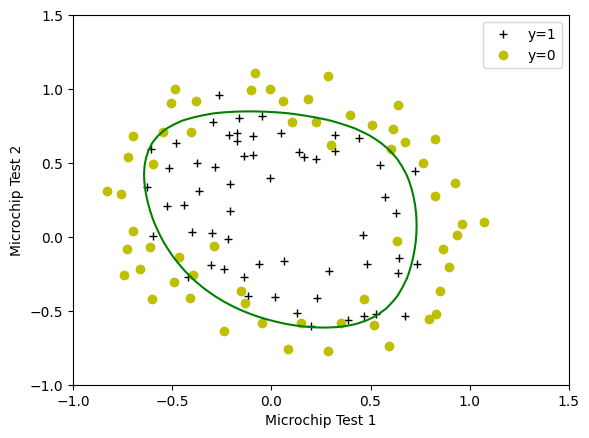

In [42]:
plot_decision_boundary(w, b, X_mapped, y_train)
# y-axis label
plt.ylabel('Microchip Test 2') 
# x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

In [45]:
# accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390
